In [1]:
from data_loader import load_all_shots
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import numpy as np
import seaborn as sns

df = load_all_shots()

df

Loading shots from 306 matches...
  Loaded 50/306 matches...
  Loaded 100/306 matches...
  Loaded 150/306 matches...
  Loaded 200/306 matches...
  Loaded 250/306 matches...
  Loaded 300/306 matches...
Successfully loaded 306 matches


,event_id,event_type,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,body_part_type,is_under_pressure,result,success,set_piece_type,match_id
0,4858179239,SHOT,1,0 days 00:03:12.675000,None,alive,33,33,204,105.600000,46.007273,174.285714,37.139463,RIGHT_FOOT,True,GOAL,True,None,122838
1,4858179388,SHOT,1,0 days 00:10:51.788000,None,alive,33,33,231,89.612069,34.756364,NaN,NaN,RIGHT_FOOT,True,OFF_TARGET,False,None,122838
2,4858179746,SHOT,1,0 days 00:18:13.971000,None,alive,33,33,53703,95.767241,33.229091,NaN,NaN,RIGHT_FOOT,True,OFF_TARGET,False,None,122838
3,4858179794,SHOT,1,0 days 00:20:05.550999,None,alive,33,33,8358,99.369863,52.007273,NaN,NaN,RIGHT_FOOT,True,OFF_TARGET,False,None,122838
4,4858179871,SHOT,1,0 days 00:22:40.930000,None,alive,38,38,9770,92.025862,33.883636,174.285714,37.126889,RIGHT_FOOT,None,SAVED,False,FREE_KICK,122838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8089,4607693875,SHOT,2,0 days 00:33:35.904999,None,alive,29,29,1522,97.577586,50.152727,NaN,NaN,RIGHT_FOOT,None,OFF_TARGET,False,None,123143
8090,4607693898,SHOT,2,0 days 00:34:17.228000,None,alive,29,29,115,100.246575,40.437158,NaN,NaN,RIGHT_FOOT,True,OFF_TARGET,False,None,123143
8091,4607693931,SHOT,2,0 days 00:37:24.804999,None,alive,29,29,26903,92.146552,52.334545,NaN,NaN,RIGHT_FOOT,True,OFF_TARGET,False,None,123143
8092,4607694134,SHOT,2,0 days 00:42:29.574999,None,alive,29,29,4123,108.545455,34.429091,NaN,NaN,RIGHT_FOOT,True,OFF_TARGET,False,None,123143


In [2]:
from data_loader import get_leaderboard

df1 = get_leaderboard(competition_id=743)

Starting data load for leaderboard...
Loading player and team metadata...
Loading shots from 306 matches...
  Loaded 50/306 matches...
  Loaded 100/306 matches...
  Loaded 150/306 matches...
  Loaded 200/306 matches...
  Loaded 250/306 matches...
  Loaded 300/306 matches...
Successfully loaded 306 matches
Total shots loaded: 8094
Calculating SDQ scores...
Generating player leaderboard...
Leaderboard created with 413 players
Adding player names...
Adding team info...
✓ Leaderboard ready with 424 players


In [3]:
df2 = df1[df1['total_shots'] >= 20].reset_index()

df2

,index,overall_sdq,sdq_median,sdq_std,consistency,avg_location_score,avg_timing_score,avg_pressure_score,avg_shot_type_score,avg_expected_value,...,avg_distance,avg_angle,shots_under_pressure,shots_in_box,conversion_rate,player_id,player_name,team_id,team,position
0,26,80.559942,81.540566,3.664362,96.335638,95.566521,70.000000,60.000000,84.166667,85.301861,...,10.382352,31.790921,24,23,8.333333,44884,Patrick Mainka,432,1. FC Heidenheim 1846,Forward
1,29,80.477291,81.462400,2.861570,97.138430,95.508704,70.000000,61.190476,82.380952,79.930249,...,NaN,NaN,20,20,4.761905,4992,Ivan Ordets,416,VfL Bochum,Midfielder
2,35,79.781496,80.803200,3.025514,96.974486,92.834422,70.000000,61.136364,84.318182,79.895781,...,11.613365,27.870974,21,22,0.000000,21094,Jeff Chabot,27,1. FC Köln,Forward
3,41,79.405224,80.779898,4.739815,95.260185,93.582505,70.000000,60.000000,82.361111,76.586117,...,11.020440,23.869810,36,33,13.888889,45493,Jordan,32,Borussia Mönchengladbach,Forward
4,43,79.362403,80.920507,6.009760,93.990240,93.189660,70.000000,60.961538,81.730769,74.147283,...,NaN,NaN,25,24,11.538462,45038,Sepp van den Berg,42,1. FSV Mainz 05,Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,388,69.530475,69.971803,6.582249,93.417751,68.052378,70.000000,71.904762,69.166667,36.597856,...,25.916402,14.293503,22,3,7.142857,281,Granit Xhaka,41,Bayer 04 Leverkusen,Midfielder
157,392,69.316614,68.256983,7.919455,92.080545,70.854036,70.250000,63.750000,72.500000,45.321504,...,23.808724,15.094135,34,13,5.000000,67486,Anton Stach,42,1. FSV Mainz 05,Midfielder
158,393,69.316614,68.256983,7.919455,92.080545,70.854036,70.250000,63.750000,72.500000,45.321504,...,23.808724,15.094135,34,13,5.000000,67486,Anton Stach,31,TSG 1899 Hoffenheim,Midfielder
159,401,68.399619,68.712645,7.704516,92.295484,64.549047,71.600000,68.000000,74.200000,39.260714,...,27.843562,14.052378,17,8,12.000000,9915,Maximilian Wittek,416,VfL Bochum,Midfielder


##### Comparing Shots of Top 3 and Bottom 3 SDQ Players 

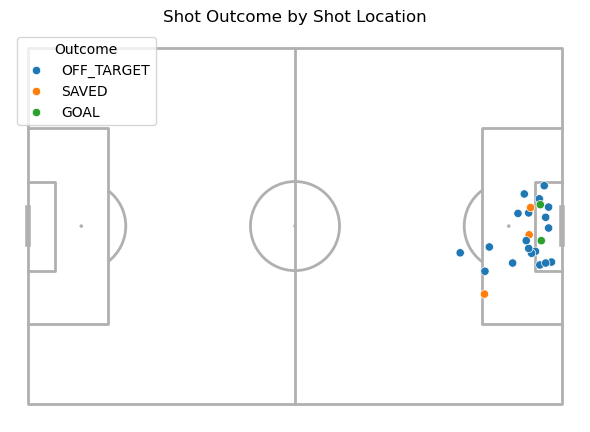

In [21]:
from shotchart import player_shot_chart

player_shot_chart(df, player_id='44884')

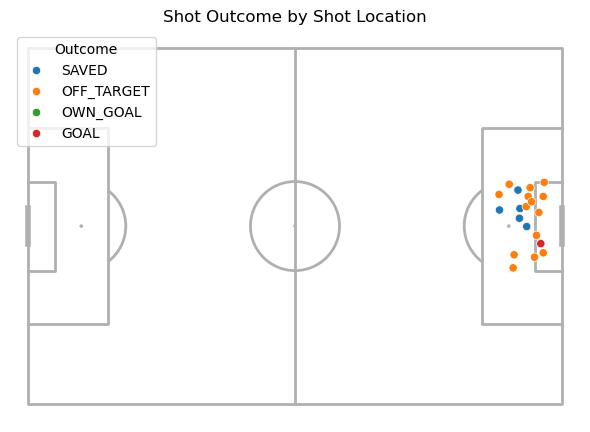

In [16]:
player_shot_chart(df, player_id='4992')

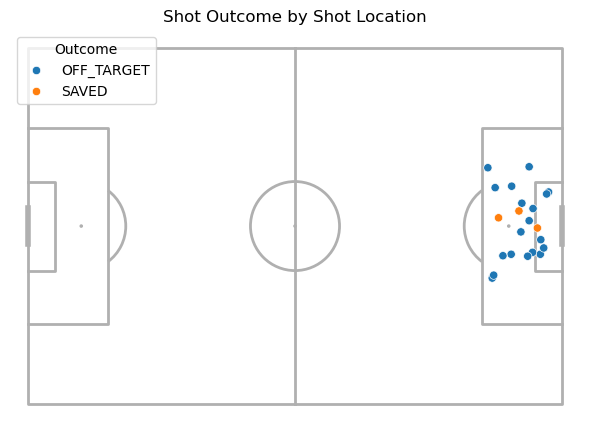

In [17]:
player_shot_chart(df, player_id='21094')

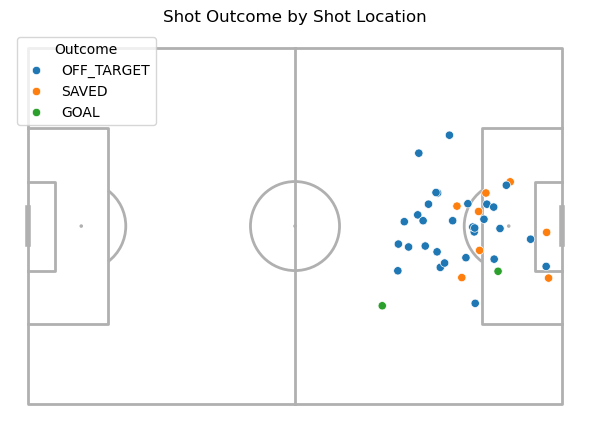

In [18]:
player_shot_chart(df, player_id='67486')

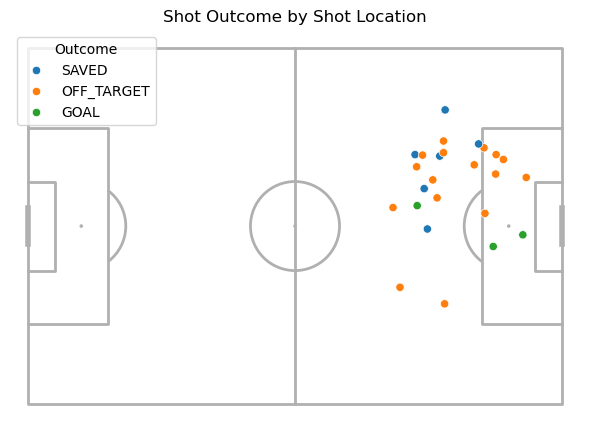

In [19]:
player_shot_chart(df, player_id='9915')

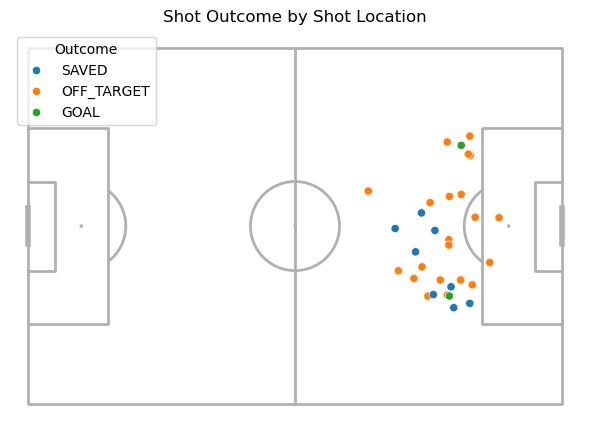

In [22]:
player_shot_chart(df, player_id='1333')

These are shot charts of the top 3 SDQ leaders and the bottom 3 players in the SDQ metric. The top 3 are Patrick Mainka, Ivan Ordets, and Jeff Chabot, respectively. The bottom 3 are Anton Stach, Maximillian Wittek, and Maximillian Arnold. Looking at the shot charts, we see a sparse difference in strategy between the leaders and bottom feeders. The top 3 players' shots are all from inside the 18 yard box, and result in a lot more goals and shots on target. The bottom 3 shot charts show a lot more shots from outside the box, which has a lower chance of going in. Many of those shots were off target, and we can conclude that shots from outside the 18 yard box are a lot less competitve than shots inside the box. 

##### Feature Engineering

In [9]:
from shot_decision_quality import ShotDecisionQuality
sdq = ShotDecisionQuality()

df['shot_angle'] = df.apply(
    lambda r: sdq.calculate_shot_angle(r['coordinates_x'], r['coordinates_y']),
    axis=1
)

df['distance_to_goal'] = df.apply(
    lambda r: sdq.calculate_distance_to_goal(r['coordinates_x'], r['coordinates_y']),
    axis=1
)

df['shot_distance'] = np.sqrt(
    (120 - df['coordinates_x'])**2 +
    (40 - df['coordinates_y'])**2
)

df["central_distance"] = abs(df["coordinates_y"] - 40)
df["is_central"] = (df["central_distance"] < 8).astype(int)


In [10]:
df["x_from_goal"] = np.where(
    df["coordinates_x"] >= 60,
    120 - df["coordinates_x"],
    df["coordinates_x"]
)

df["in_box"] = (df["x_from_goal"] <= 18).astype(int)
df["in_six_yard_box"] = (df["x_from_goal"] <= 6).astype(int)

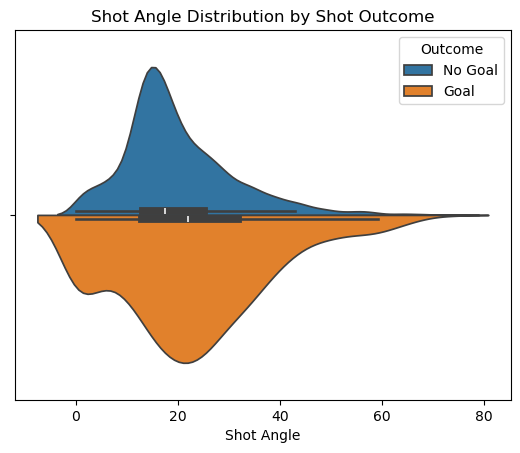

In [11]:
fig, ax = plt.subplots()
sns.violinplot(x=df['shot_angle'], hue=df['success'], split=True, ax=ax)

ax.set_title('Shot Angle Distribution by Shot Outcome')
ax.set_xlabel('Shot Angle')
handles, labels = ax.get_legend_handles_labels()
labels = ['No Goal', 'Goal']
ax.legend(handles, labels, title='Outcome')
plt.show()

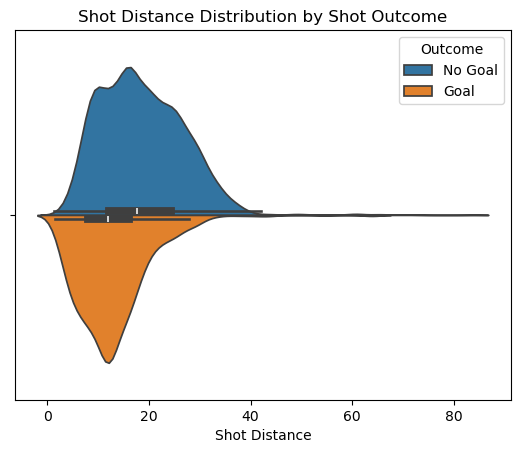

In [12]:
fig, ax = plt.subplots()
sns.violinplot(x=df['shot_distance'], hue=df['success'], split=True, ax=ax)

ax.set_title('Shot Distance Distribution by Shot Outcome')
ax.set_xlabel('Shot Distance')
handles, labels = ax.get_legend_handles_labels()
labels = ['No Goal', 'Goal']
ax.legend(handles, labels, title='Outcome')
plt.show()

##### Classification Model

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, brier_score_loss, log_loss, confusion_matrix, ConfusionMatrixDisplay

In [23]:
df1 = df.dropna(subset=['coordinates_x', 'coordinates_y', 'shot_angle', 'shot_distance', 'is_central', 'in_box', 'in_six_yard_box'])
X = df1[['shot_distance', 'shot_angle', 'is_central', 'in_box', 'in_six_yard_box']]
Y = df1['success']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, Y_train)

LogisticRegression()

In [25]:
preds = logreg.predict(X_test_scaled)
probs = logreg.predict_proba(X_test_scaled)[:, 1]
preds = (probs > 0.15).astype(int)


acc = accuracy_score(Y_test, preds)
recall = recall_score(Y_test, preds)
prec = precision_score(Y_test, preds)
f1 = f1_score(Y_test, preds)

print(f'Accuracy:     {acc:.3f}')
print(f'Recall:       {recall:.3f}')
print(f'Precision:    {prec:.3f}')
print(f'F1 Score:     {f1:.3f}')
print('-------------------')

# probability-based evaluation metrics
ll = log_loss(Y_test, probs)
brier = brier_score_loss(Y_test, probs)

print(f'Log Loss:     {ll:.3f}')
print(f'Brier Score:  {brier:.3f}')

Accuracy:     0.691
Recall:       0.606
Precision:    0.198
F1 Score:     0.299
-------------------
Log Loss:     0.327
Brier Score:  0.093


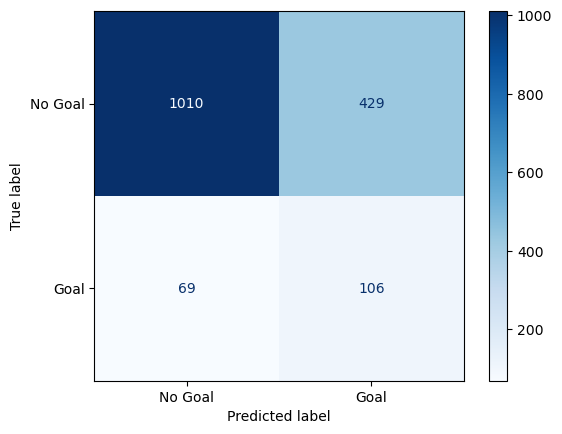

In [26]:
conf_mat = confusion_matrix(Y_test, preds)
ConfusionMatrixDisplay(conf_mat, display_labels=['No Goal', 'Goal']).plot(cmap='Blues')

plt.show()

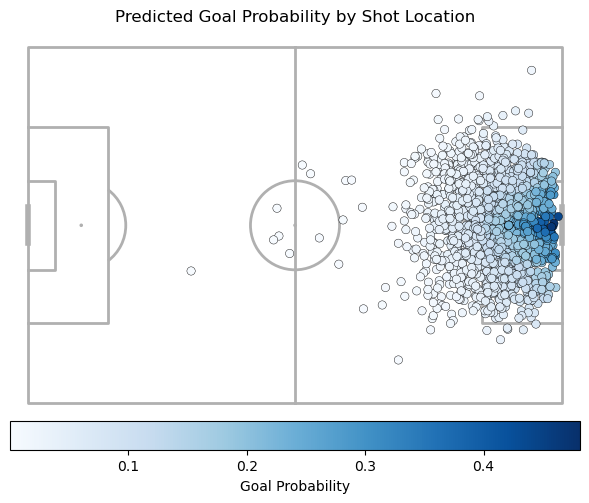

In [27]:
pitch = Pitch()
fig, ax = pitch.draw(figsize=(6, 6))

sc = ax.scatter(
    df.loc[X_test.index, 'coordinates_x'],
    df.loc[X_test.index, 'coordinates_y'],
    c=probs,   
    cmap='Blues',     
    linewidth=0.3,
    edgecolors='Black'
)

# customize
cbar = plt.colorbar(sc, ax=ax, location='bottom', pad=0)
cbar.set_label('Goal Probability')
plt.title('Predicted Goal Probability by Shot Location')
plt.tight_layout()
plt.show()

This shot chart shows that the model predicts mostly shots from the center of the box and closer to the goal are likely to be a goal. The model aligns with common soccer strategy, and it makes sense that the closer a shot is, the more likely chance it has to go in.